In [1]:
from utils import split_data

PATH = "./data/"
splitter = split_data(PATH + "raw.csv", PATH, test_size=0.1,
                          train_size=0.2)
x_train, y_train, x_test, y_test = splitter.split()

/home/paperspace/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from utils import translate

translater = translate()
x_train = translater.translate(x_train)
x_test = translater.translate(x_test)

In [3]:
from utils import standardize

y_train_std, y_test_std = standardize(y_train, y_test)

In [4]:
from keras.layers import (Embedding, Bidirectional, CuDNNGRU, Dense)
from modelArchitecture.Attention import Attention
from modelArchitecture.ResnetRnnDense import ResnetRnnDense

class simple_model():
    def compile(self, x):
        x = Embedding(22, 32, input_length=32)(x)
        
        x = Bidirectional(CuDNNGRU(256, return_sequences=True))(x)
        x = CuDNNGRU(512, return_sequences=True)(x)
        x = Attention()(x)
        x = Dense(512, activation="elu")(x)
        return Dense(1, activation="relu")(x)

In [5]:
from HydraMethod import HydraMethod

In [6]:
one_head_hydra = HydraMethod(simple_model, 1);one_head_hydra.compile()

In [7]:
from utils import LRFinder

In [9]:
lr_finder = LRFinder(one_head_hydra.get_model())
lr_finder.find(one_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 256, 3,fit=True)

Epoch 1/3
216313/216313 [==============================] - 40s 187us/step - loss: 0.7195
Epoch 2/3
201216/216313 [==========================>...] - ETA: 2s - loss: 0.4305

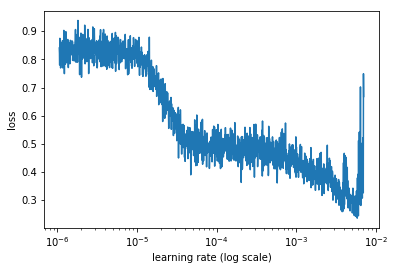

In [10]:
lr_finder.plot_loss()

In [11]:
one_head_hydra.compile(learning_rate=1e-3)
trained_one_head_hydra = one_head_hydra.fit(x_train, y_train_std, x_test, y_test_std,batch_size=256)

Train on 216313 samples, validate on 106917 samples
Epoch 1/3
216313/216313 [==============================] - 45s 209us/step - loss: 0.1792 - val_loss: 0.1430
Epoch 2/3
216313/216313 [==============================] - 44s 205us/step - loss: 0.1155 - val_loss: 0.1045
Epoch 3/3
216313/216313 [==============================] - 44s 205us/step - loss: 0.0904 - val_loss: 0.0923


In [12]:
two_head_hydra = HydraMethod(simple_model, 2);two_head_hydra.compile()

In [15]:
lr_finder = LRFinder(two_head_hydra.get_model())
lr_finder.find(two_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 256, 3,fit=True)

Epoch 1/3
216313/216313 [==============================] - 76s 353us/step - loss: 0.7082
Epoch 2/3
216064/216313 [============================>.] - ETA: 0s - loss: 0.4186

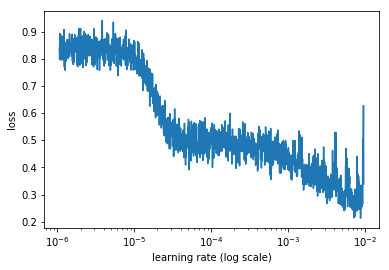

In [16]:
lr_finder.plot_loss()

In [17]:
two_head_hydra.compile(learning_rate=1e-3)
trained_two_head_hydra = two_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256)

Train on 216313 samples, validate on 106917 samples
Epoch 1/3
216313/216313 [==============================] - 86s 398us/step - loss: 1.0058 - val_loss: 0.8451
Epoch 2/3
216313/216313 [==============================] - 85s 391us/step - loss: 0.8544 - val_loss: 0.7944
Epoch 3/3
216313/216313 [==============================] - 85s 391us/step - loss: 0.8389 - val_loss: 0.7942


In [18]:
three_head_hydra = HydraMethod(simple_model, 3);three_head_hydra.compile()

In [19]:
lr_finder = LRFinder(three_head_hydra.get_model())
lr_finder.find(three_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 256, 3,fit=True)

Epoch 1/3
216313/216313 [==============================] - 119s 551us/step - loss: 0.5720
Epoch 2/3
216313/216313 [==============================] - 113s 524us/step - loss: 0.1934
Epoch 3/3
 20224/216313 [=>............................] - ETA: 1:42 - loss: 0.3219

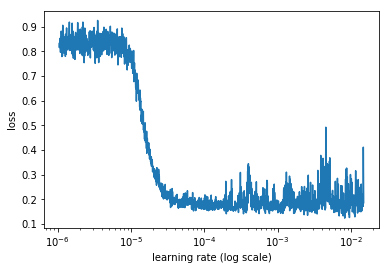

In [20]:
lr_finder.plot_loss()

In [21]:
three_head_hydra.compile(learning_rate=1e-3)
trained_three_head_hydra = three_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256)

Train on 216313 samples, validate on 106917 samples
Epoch 1/3
216313/216313 [==============================] - 136s 628us/step - loss: 0.1009 - val_loss: 0.0907
Epoch 2/3
216313/216313 [==============================] - 131s 606us/step - loss: 0.0754 - val_loss: 0.0717
Epoch 3/3
216313/216313 [==============================] - 131s 605us/step - loss: 0.0668 - val_loss: 0.0706


In [22]:
four_head_hydra = HydraMethod(simple_model, 4);four_head_hydra.compile()

In [23]:
lr_finder = LRFinder(four_head_hydra.get_model())
lr_finder.find(four_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 256, 3,fit=True)

Epoch 1/3
216313/216313 [==============================] - 158s 731us/step - loss: 0.7101
Epoch 2/3
207104/216313 [===========================>..] - ETA: 6s - loss: 0.4212

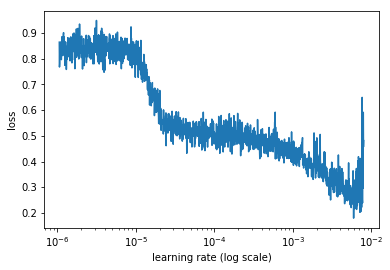

In [24]:
lr_finder.plot_loss()

In [ ]:
four_head_hydra.compile(learning_rate=1e-3)
trained_four_head_hydra = four_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256)

Train on 216313 samples, validate on 106917 samples
Epoch 1/3
216313/216313 [==============================] - 183s 844us/step - loss: 0.1438 - val_loss: 0.1081
Epoch 2/3
216313/216313 [==============================] - 174s 802us/step - loss: 0.0926 - val_loss: 0.1015
Epoch 3/3
 26880/216313 [==>...........................] - ETA: 2:09 - loss: 0.0829

In [ ]:
one_head_hydra = HydraMethod(ResnetRnnDense, 1);one_head_hydra.compile()

In [ ]:
from utils import LRFinder

In [ ]:
lr_finder = LRFinder(one_head_hydra.get_model())
lr_finder.find(one_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 64, 3,fit=True)

In [ ]:
lr_finder.plot_loss()

In [ ]:
one_head_hydra.compile(learning_rate=1e-3)
trained_one_head_hydra = one_head_hydra.fit(x_train, y_train_std, x_test, y_test_std)

In [ ]:
two_head_hydra = HydraMethod(ResnetRnnDense, 2);two_head_hydra.compile()

In [ ]:
lr_finder = LRFinder(two_head_hydra.get_model())
lr_finder.find(two_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 64, 3,fit=True)

In [ ]:
lr_finder.plot_loss()

In [ ]:
two_head_hydra.compile(learning_rate=4e-5)
trained_two_head_hydra = two_head_hydra.fit(x_train, y_train_std, x_test, y_test_std)